In [1]:
import numpy as np
import pandas as pd
import os
import itertools
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = load_wine(return_X_y=True, as_frame=True)
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)
scaled_X_train = scaler.fit_transform(X_train)
print(type(scaled_X_train))

<class 'numpy.ndarray'>


In [9]:
# copy of 'create_dataset' code

from sklearn.preprocessing import LabelEncoder

dataset_dir = './SimTSC/datasets/EBC'
dataset_name = '5day_surveyext_Nov22Feb24_stanscaler'
shot = 2

dataset_dir = os.path.join(dataset_dir, dataset_name)
df_train = pd.read_csv(os.path.join(dataset_dir, dataset_name+'_TRAIN_ed.tsv'), sep='\t', header=None)
df_test = pd.read_csv(os.path.join(dataset_dir, dataset_name+'_TEST_ed.tsv'), sep='\t', header=None)
df_val = pd.read_csv(os.path.join(dataset_dir, dataset_name+'_VAL_ed.tsv'), sep='\t', header=None)

y_train = df_train.values[:, 0].astype(str)
y_test = df_test.values[:, 0].astype(str)
y_val = df_val.values[:, 0].astype(str)
y = np.concatenate((y_train, y_test, y_val))
le = LabelEncoder()
le.fit(y)
print(le.classes_)
y = le.transform(y)

X_train = df_train.drop(columns=[0]).astype(np.float32)
X_test = df_test.drop(columns=[0]).astype(np.float32)
X_val = df_val.drop(columns=[0]).astype(np.float32)

X_train.columns = range(X_train.shape[1])
X_test.columns = range(X_test.shape[1])
X_val.columns = range(X_val.shape[1])

X_train = X_train.values
X_test = X_test.values
X_val = X_val.values
print(X_train.shape)
print(X_test.shape)
X = np.concatenate((X_train, X_test, X_val))
idx = np.array([i for i in range(len(X))])

np.random.shuffle(idx)
train_idx = idx[:int(len(idx)*0.5)] 
val_idx = idx[int(len(idx)*0.5):int(len(idx)*0.7)]
test_idx = idx[int(len(idx)*0.7):]
print("Space")
print(train_idx.shape)
print(test_idx.shape)
print(val_idx.shape)

# tmp = [[] for _ in range(len(np.unique(y)))]
# for i in train_idx:
#     tmp[y[i]].append(i)
# train_idx = []
# for _tmp in tmp:
#     train_idx.extend(_tmp[:shot])

# znorm
X[np.isnan(X)] = 0
std_ = X.std(axis=1, keepdims=True)
std_[std_ == 0] = 1.0
X = (X - X.mean(axis=1, keepdims=True)) / std_

# add a dimension to make it multivariate with one dimension 
X = X.reshape((X.shape[0], 1, X.shape[1]))
print(X.shape)
       
# output_dir = './tmp'
# dataset_tosave ="debug_data"
# output_dir = os.path.join(output_dir, 'debug')
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)
# data = {
#             'X': X,
#             'y': y,
#             'train_idx': train_idx,
#             'test_idx': test_idx
#         }
# np.save(os.path.join(output_dir, dataset_tosave), data)

['Operating' 'Speed' 'Temperature' 'Valve']
(564, 480)
(346, 480)
Space
(576,)
(346,)
(230,)
(1152, 1, 480)


In [10]:
# Describe dataset which is stored as Numpy array (after create_dataset script is run)

data_dir = './SimTSC/tmp'
dataset_name = '5day_surveyext_Nov22Feb24_stanscaler'
shot = 1
path = os.path.join(data_dir, 'ebc_'+str(shot)+'_shot', dataset_name+'.npy')
# path = os.path.join(data_dir, 'ebc_', dataset_name+'.npy')
data = np.load(path, allow_pickle=True)
# data[()]['X'], data[()]['y'], data[()]['train_idx'], data[()]['test_idx']
print(data[()]['X'].shape)
print(data[()]['y'].shape)
print(len(data[()]['train_idx']))
print(len(data[()]['test_idx']))
print(len(data[()]['val_idx']))

X = data[()]['X'].reshape((data[()]['X'].shape[0], data[()]['X'].shape[2]))
X = np.transpose(X)
dtw_describe = pd.DataFrame(X)
dtw_describe.describe()

##
# this_idx = data[()]['train_idx'][100]
# print(data[()]['X'][this_idx])
# print(data[()]['y'][this_idx])

(1152, 1, 480)
(1152,)
172
346
634


,0,1,2,3,4,5,6,7,8,9,...,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,...,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,-0.525366,-0.016252,0.343052,0.352779,-1.019219,1.309228,-0.193936,1.576682,0.378683,-0.987059,...,1.659343,-0.054981,-0.600245,-1.065828,-1.031686,-0.844882,0.239754,1.659356,0.048383,-0.989800
std,0.766184,0.081998,0.078992,0.029055,0.067324,0.094736,0.035171,1.170085,0.030658,0.062913,...,0.114421,0.044343,0.168231,0.155384,0.065878,0.528648,0.596026,0.114422,0.026122,0.063443
min,-1.052755,-0.276563,0.017826,0.006277,-1.053225,0.103341,-0.250691,-0.562919,0.008813,-1.007318,...,0.139254,-0.137578,-0.988501,-1.297089,-1.053225,-1.053225,-1.047482,0.139259,-0.025011,-1.031031
25%,-1.040498,-0.048548,0.286346,0.344688,-1.040660,1.293974,-0.227486,0.797741,0.370364,-0.998408,...,1.648097,-0.089434,-0.709822,-1.176511,-1.043756,-1.041876,0.231188,1.648108,0.029004,-0.999651
50%,-1.030710,-0.012508,0.336522,0.354189,-1.031133,1.316112,-0.191503,0.925240,0.380504,-0.992894,...,1.670000,-0.059272,-0.595112,-1.088482,-1.038047,-1.034993,0.377906,1.670029,0.043590,-0.994771
75%,0.490479,0.045208,0.402057,0.365655,-1.003833,1.339822,-0.158807,2.975757,0.391748,-0.985627,...,1.688895,-0.023824,-0.495329,-0.978321,-1.030186,-1.026860,0.597427,1.688930,0.068535,-0.987728
max,1.146185,0.132726,0.540267,0.384823,-0.134904,1.396078,-0.046879,9.993430,0.410483,-0.130335,...,1.727995,0.041090,-0.097276,-0.147559,-0.134904,0.842290,2.936970,1.728046,0.133686,-0.130335


In [18]:
# Concatenate multiple csv files (with same datapoint columns) to a single dataframe

data_part1 = pd.read_csv(r'/home/vaibhavs/Master_Thesis/ma-vaibhav/Data/data_survey_15m_Nov22_Mar23.csv')
data_part2 = pd.read_csv(r'/home/vaibhavs/Master_Thesis/ma-vaibhav/Data/data_survey_15m_Nov23_Feb24.csv')
print(data_part1.shape)
print(data_part2.shape)

assert len(data_part1.columns) == len(data_part2.columns), f"number of columns do not match"

data = pd.concat([data_part1, data_part2], axis=0)
print(data.shape)


(14401, 9)
(11233, 9)
(25634, 9)


In [6]:
# Load AHU data from .csv file (generated by Aedifion) and convert into (n_samples X n_timestamps) format

from sklearn.preprocessing import StandardScaler 

data = pd.read_csv(r'/home/vaibhavs/Master_Thesis/ma-vaibhav/Data/data_survey_ext_15m_Nov22_Feb24.csv')

all_points = []
all_labels = []
datapoint_names = data.columns.tolist()
datapoint_names.remove('time')
minute_multiples = 480

for datapoint in datapoint_names:
    data_list = []
    label_list = []
    dp_timeseries = data[['time',datapoint]]
    rows = dp_timeseries.shape[0]
    for i in range(0,rows,minute_multiples+1):
        if i <= rows-minute_multiples:
            sample = dp_timeseries.iloc[i:i+minute_multiples, [1]].transpose()
            sample_list = sample.values.tolist()
            data_list.append(sample_list[0])
    
    label_list = [datapoint] * len(data_list)
    all_labels.append(label_list) 
    all_points.append(data_list)

all_points = list(itertools.chain.from_iterable(all_points))
all_labels = list(itertools.chain.from_iterable(all_labels))

orig_labels = all_labels.copy()

# convert datapoint names to class labels
# uniform_HR_labels = ['HR' if 'HR' in x else x for x in all_labels]
# uniform_EHA_labels = ['EHA' if 'EHA' in x else x for x in uniform_HR_labels]
# uniform_PH_labels = ['ODA' if 'PH' in x else x for x in uniform_EHA_labels]
# uniform_ODA_labels = ['ODA' if 'ODA' in x else x for x in uniform_PH_labels]

# uniform_flap_labels = ['Flap / Valve' if x in ['Flap / Valve.1','Flap / Valve.2','Flap / Valve.3'] else x for x in all_labels]
# uniform_temp_labels = ['Temperature' if x in ['Temperature.1'] else x for x in uniform_flap_labels]
# uniform_hum_labels = ['Humidity' if 'Hum' in x else x for x in all_labels]
# uniform_flap_labels = ['Flap / Valve' if 'Flap' in x else x for x in uniform_hum_labels]
# uniform_temp_labels = ['Temperature' if 'Temp' in x else x for x in uniform_flap_labels]
# uniform_cont_labels = ['Control Mode' if 'ContMode' in x else x for x in uniform_temp_labels]
# uniform_volume_labels = ['Volume' if 'Vol' in x else x for x in uniform_cont_labels]
# uniform_speed_labels = ['Speed' if 'Speed' in x else x for x in uniform_volume_labels]
# uniform_error_labels = ['Error' if 'Error' in x else x for x in uniform_speed_labels]
# uniform_pressure_labels = ['Pressure' if 'Pressure' in x else x for x in uniform_error_labels]
# uniform_pump_labels = ['Pump Operating' if 'PumpOperating' in x or 'PumpSet' in x else x for x in uniform_pressure_labels]
# uniform_power_labels = ['Power' if 'Power' in x else x for x in uniform_pump_labels]
# uniform_vdp_labels = ['Vdp' if 'Vdp' in x else x for x in uniform_power_labels]

# all_labels = uniform_ODA_labels
print(list(set(all_labels)))

# check if number of labels (y) and number of time series (x) is equal
assert len(all_points) == len(all_labels), f"length of timeseries values list ({len(all_points)}) is not equal to length of datapoint labels list ({len(all_labels)}). Please make sure timeseries and their datapoint labels are of equal length"

# comb_labels = [all_labels, orig_labels]
numpy_data = np.asarray(all_points)
# numpy_labels = np.asarray(comb_labels)
numpy_labels = np.asarray(all_labels)

print(numpy_data.shape)

scaler = StandardScaler()
scaled_numpy_data = scaler.fit_transform(numpy_data)

X_train, X_test, y_train, y_test = train_test_split(scaled_numpy_data, numpy_labels, test_size=0.30, random_state=42, shuffle=True, stratify=numpy_labels)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=42, shuffle=True, stratify=y_train)

print(np.unique(y_train, return_counts=True))
print(np.unique(y_val, return_counts=True))
print(np.unique(y_test, return_counts=True))


['ADS.bAHURHPumpOperatingADSInternalValuesMirror', 'ADS.fAHURHValveActADSInternalValuesMirror', 'ADS.fAHUFanETASpeedActADSInternalValuesMirror', 'ADS.fAHUTempODAADSInternalValuesMirror', 'ADS.fAHUPHValveActADSInternalValuesMirror', 'ADS.fAHUCOValveActADSInternalValuesMirror', 'ADS.fAHUFanSUPSpeedSetADSInternalValuesMirror', 'ADS.fAHUTempETAADSInternalValuesMirror', 'ADS.fAHUTempSUPADSInternalValuesMirror', 'ADS.fAHUFanSUPSpeedActADSInternalValuesMirror', 'ADS.bAHUCOPumpOperatingADSInternalValuesMirror', 'ADS.bAHUPHPumpOperatingADSInternalValuesMirror']
(1152, 480)
(array(['ADS.bAHUCOPumpOperatingADSInternalValuesMirror',
       'ADS.bAHUPHPumpOperatingADSInternalValuesMirror',
       'ADS.bAHURHPumpOperatingADSInternalValuesMirror',
       'ADS.fAHUCOValveActADSInternalValuesMirror',
       'ADS.fAHUFanETASpeedActADSInternalValuesMirror',
       'ADS.fAHUFanSUPSpeedActADSInternalValuesMirror',
       'ADS.fAHUFanSUPSpeedSetADSInternalValuesMirror',
       'ADS.fAHUPHValveActADSInternal

In [7]:
# Save train and test datasets as .tsv files

dataset_dir = './SimTSC/datasets/EBC'
dataset_name = '5day_surveyext_Nov22Feb24_stanscaler'

dataset_dir = os.path.join(dataset_dir, dataset_name)

# Save train dataset
Xseries_train = pd.DataFrame(data=X_train, columns=range(1,minute_multiples+1))
Ylabels_train = pd.DataFrame(data=y_train)

train_merged = pd.concat([Ylabels_train, Xseries_train], axis=1)

if not os.path.exists(dataset_dir):
        os.makedirs(dataset_dir)
train_merged.to_csv(os.path.join(dataset_dir, dataset_name+'_TRAIN.tsv'), sep='\t', index=False, header=None)

# Save test dataset
Xseries_test = pd.DataFrame(data=X_test, columns=range(1,minute_multiples+1))
Ylabels_test = pd.DataFrame(data=y_test)

test_merged = pd.concat([Ylabels_test, Xseries_test], axis=1)

if not os.path.exists(dataset_dir):
        os.makedirs(dataset_dir)
test_merged.to_csv(os.path.join(dataset_dir, dataset_name+'_TEST.tsv'), sep='\t', index=False, header=None)

# Save validation dataset
Xseries_val = pd.DataFrame(data=X_val, columns=range(1,minute_multiples+1))
Ylabels_val = pd.DataFrame(data=y_val)

val_merged = pd.concat([Ylabels_val, Xseries_val], axis=1)

if not os.path.exists(dataset_dir):
        os.makedirs(dataset_dir)
val_merged.to_csv(os.path.join(dataset_dir, dataset_name+'_VAL.tsv'), sep='\t', index=False, header=None)

In [8]:
# Transform datapoint names to class labels

dataset_dir = './SimTSC/datasets/EBC'
dataset_name = '5day_surveyext_Nov22Feb24_stanscaler'

dataset_dir = os.path.join(dataset_dir, dataset_name)
df_train = pd.read_csv(os.path.join(dataset_dir, dataset_name+'_TRAIN.tsv'), sep='\t', header=None)
df_test = pd.read_csv(os.path.join(dataset_dir, dataset_name+'_TEST.tsv'), sep='\t', header=None)
df_val = pd.read_csv(os.path.join(dataset_dir, dataset_name+'_VAL.tsv'), sep='\t', header=None)

ltrain = df_train.iloc[:,0].tolist()
ltest = df_test.iloc[:,0].tolist()
lval = df_val.iloc[:,0].tolist()

# convert datapoint names to class labels
# train_oda_labels = ['ODA' if 'ODA' in x else x for x in ltrain]
train_temp_labels = ['Temperature' if 'Temp' in x else x for x in ltrain]
# train_fan_labels = ['Fan' if 'Fan' in x else x for x in train_temp_labels]
train_valve_labels = ['Valve' if 'Valve' in x else x for x in train_temp_labels]
train_speed_labels = ['Speed' if 'Speed' in x else x for x in train_valve_labels]
train_oper_labels = ['Operating' if 'Operating' in x else x for x in train_speed_labels]

print(list(set(train_oper_labels)))

# test_flap_labels = ['Flap' if 'Flap' in x else x for x in ltest]
# test_oda_labels = ['ODA' if 'ODA' in x else x for x in ltest]
test_temp_labels = ['Temperature' if 'Temp' in x else x for x in ltest]
# test_fan_labels = ['Fan' if 'Fan' in x else x for x in test_temp_labels]
test_valve_labels = ['Valve' if 'Valve' in x else x for x in test_temp_labels]
test_speed_labels = ['Speed' if 'Speed' in x else x for x in test_valve_labels]
test_oper_labels = ['Operating' if 'Operating' in x else x for x in test_speed_labels]

# val_flap_labels = ['Flap' if 'Flap' in x else x for x in lval]
# val_oda_labels = ['ODA' if 'ODA' in x else x for x in lval]
val_temp_labels = ['Temperature' if 'Temp' in x else x for x in lval]
# val_fan_labels = ['Fan' if 'Fan' in x else x for x in val_temp_labels]
val_valve_labels = ['Valve' if 'Valve' in x else x for x in val_temp_labels]
val_speed_labels = ['Speed' if 'Speed' in x else x for x in val_valve_labels]
val_oper_labels = ['Operating' if 'Operating' in x else x for x in val_speed_labels]

df_train.iloc[:,0] = train_oper_labels
df_test.iloc[:,0] = test_oper_labels
df_val.iloc[:,0] = val_oper_labels

print(np.unique(train_oper_labels, return_counts=True))
print(np.unique(test_oper_labels, return_counts=True))
print(np.unique(val_oper_labels, return_counts=True))

df_train.to_csv(os.path.join(dataset_dir, dataset_name+'_TRAIN_ed.tsv'), sep='\t', index=False, header=None)
df_test.to_csv(os.path.join(dataset_dir, dataset_name+'_TEST_ed.tsv'), sep='\t', index=False, header=None)
df_val.to_csv(os.path.join(dataset_dir, dataset_name+'_VAL_ed.tsv'), sep='\t', index=False, header=None)

['Operating', 'Temperature', 'Valve', 'Speed']
(array(['Operating', 'Speed', 'Temperature', 'Valve'], dtype='<U11'), array([141, 141, 141, 141]))
(array(['Operating', 'Speed', 'Temperature', 'Valve'], dtype='<U11'), array([87, 87, 85, 87]))
(array(['Operating', 'Speed', 'Temperature', 'Valve'], dtype='<U11'), array([60, 60, 62, 60]))


In [186]:
# Fill graph from data-model

# Read dataset
dataset_dir = './SimTSC/datasets/EBC'
dataset_name = 'SubSys_Nov22_Mar23'

dataset_dir = os.path.join(dataset_dir, dataset_name)
df_train = pd.read_csv(os.path.join(dataset_dir, dataset_name+'_TRAIN.tsv'), sep='\t', header=None)
df_test = pd.read_csv(os.path.join(dataset_dir, dataset_name+'_TEST.tsv'), sep='\t', header=None)
df_val = pd.read_csv(os.path.join(dataset_dir, dataset_name+'_VAL.tsv'), sep='\t', header=None)

Y_train = df_train[df_train.columns[0]].astype(np.str)
Y_test = df_test[df_test.columns[0]].astype(np.str)
Y_val = df_val[df_val.columns[0]].astype(np.str)

# X_train.columns = range(X_train.shape[1])
# X_test.columns = range(X_test.shape[1])
# X_val.columns = range(X_val.shape[1])

Y_train = Y_train.values
Y_test = Y_test.values
Y_val = Y_val.values
Y = np.concatenate((Y_train, Y_test, Y_val), axis=0)

Y = Y.copy(order='C').astype(np.str)
# Y[np.isnan(Y)] = 0

print(Y.shape)

edges = np.zeros((Y.shape[0], Y.shape[0]), dtype=np.float64)
flag_edges = np.full((Y.shape[0], Y.shape[0]), False, dtype=bool)

i_idx = []
j_idx = []

for i in range(len(Y)):
    for j in range(len(Y)):
        if Y[i] == 'ADS.fAHUPHValveSetADSInternalValuesMirror' and Y[j] == 'ADS.fAHUPHValveActADSInternalValuesMirror':
            edges[i,j] = 1
            flag_edges[i,j] = True
        elif Y[i] == 'ADS.fAHUPHValveSetADSInternalValuesMirror' and Y[j] == 'ADS.eAHUPHPumpContModeADSInternalValuesMirror':
            edges[i,j] = 1
            flag_edges[i,j] = True
        elif Y[i] == 'ADS.fAHUPHValveActADSInternalValuesMirror' and Y[j] == 'ADS.eAHUPHPumpContModeADSInternalValuesMirror':
            edges[i,j] = 1
            flag_edges[i,j] = True
        elif Y[i] == 'ADS.eAHUPHPumpContModeADSInternalValuesMirror' and Y[j] == 'ADS.fAHUPHPumpSpeedADSInternalValuesMirror':
            edges[i,j] = 1
            flag_edges[i,j] = True
        elif Y[i] == 'ADS.eAHUPHPumpContModeADSInternalValuesMirror' and Y[j] == 'ADS.fAHUPHPumpVolFlowADSInternalValuesMirror':
            edges[i,j] = 1
            flag_edges[i,j] = True
        elif Y[i] == 'ADS.eAHUPHPumpContModeADSInternalValuesMirror' and Y[j] == 'ADS.bAHUPHPumpErrorADSInternalValuesMirror':
            edges[i,j] = 1
            flag_edges[i,j] = True
        elif Y[i] == 'ADS.fAHUPHPumpSpeedADSInternalValuesMirror' and Y[j] == 'ADS.fAHUPHPumpVolFlowADSInternalValuesMirror':
            edges[i,j] = 1
            flag_edges[i,j] = True
        elif Y[i] == 'ADS.fAHUPHPumpSpeedADSInternalValuesMirror' and Y[j] == 'ADS.bAHUPHPumpErrorADSInternalValuesMirror':
            edges[i,j] = 1
            flag_edges[i,j] = True
        elif Y[i] == 'ADS.fAHUPHPumpVolFlowADSInternalValuesMirror' and Y[j] == 'ADS.bAHUPHPumpErrorADSInternalValuesMirror':
            edges[i,j] = 1
            flag_edges[i,j] = True
        elif Y[i] == 'ADS.fAHUPHPumpVolFlowADSInternalValuesMirror' and Y[j] == 'ADS.fAHUPHTempSupPrimADSInternalValuesMirror':
            edges[i,j] = 1
            flag_edges[i,j] = True
        elif Y[i] == 'ADS.fAHUPHPumpVolFlowADSInternalValuesMirror' and Y[j] == 'ADS.fAHUPHTempRetPrimADSInternalValuesMirror':
            edges[i,j] = 1
            flag_edges[i,j] = True
            # till here
        elif Y[i] == 'ADS.fAHUPHTempSupPrimADSInternalValuesMirror' and Y[j] == 'ADS.fAHUPHTempRetPrimADSInternalValuesMirror':
            edges[i,j] = 1
            flag_edges[i,j] = True
        elif Y[i] == 'ADS.fAHUPHTempSupPrimADSInternalValuesMirror' and Y[j] == 'ADS.fAHUHRBypValveAct1ADSInternalValuesMirror':
            edges[i,j] = 1
            flag_edges[i,j] = True
        elif Y[i] == 'ADS.fAHUHRBypValveAct1ADSInternalValuesMirror' and Y[j] == 'ADS.fAHUHRBypValveSetADSInternalValuesMirror':
            edges[i,j] = 1
            flag_edges[i,j] = True
        elif Y[i] == 'ADS.fAHUHRBypValveAct1ADSInternalValuesMirror' and Y[j] == 'ADS.fAHUTempEHAADSInternalValuesMirror':
            edges[i,j] = 1
            flag_edges[i,j] = True
        elif Y[i] == 'ADS.fAHUTempEHAADSInternalValuesMirror' and Y[j] == 'ADS.fAHUHumEHAADSInternalValuesMirror':
            edges[i,j] = 1
            flag_edges[i,j] = True
        elif Y[i] == 'ADS.fAHUHumEHAADSInternalValuesMirror' and Y[j] == 'ADS.fAHUFlapEHAActADSInternalValuesMirror':
            edges[i,j] = 1
            flag_edges[i,j] = True
        elif Y[i] == 'ADS.fAHUHumEHAADSInternalValuesMirror' and Y[j] == 'ADS.fAHUFlapEHASetADSInternalValuesMirror':
            edges[i,j] = 1
            flag_edges[i,j] = True
        elif Y[i] == 'ADS.fAHUHumODAADSInternalValuesMirror' and Y[j] == 'ADS.fAHUPHValveActADSInternalValuesMirror':
            edges[i,j] = 1
            flag_edges[i,j] = True
        elif Y[i] == 'ADS.fAHUHumODAADSInternalValuesMirror' and Y[j] == 'ADS.fAHUPHValveSetADSInternalValuesMirror':
            edges[i,j] = 1
            flag_edges[i,j] = True
        elif Y[i] == 'ADS.fAHUTempODAADSInternalValuesMirror' and Y[j] == 'ADS.fAHUHumODAADSInternalValuesMirror':
            edges[i,j] = 1
            flag_edges[i,j] = True
        elif Y[i] == 'ADS.fAHUTempODAADSInternalValuesMirror' and Y[j] == 'ADS.fAHUFlapODAActADSInternalValuesMirror':
            edges[i,j] = 1
            flag_edges[i,j] = True
        elif Y[i] == 'ADS.fAHUTempODAADSInternalValuesMirror' and Y[j] == 'ADS.fAHUFlapODASetADSInternalValuesMirror':
            edges[i,j] = 1
            flag_edges[i,j] = True
        elif Y[i] == 'ADS.fAHUFlapODAActADSInternalValuesMirror' and Y[j] == 'ADS.fAHUFlapODASetADSInternalValuesMirror':
            edges[i,j] = 1
            flag_edges[i,j] = True
        elif Y[i] == Y[j]:
            edges[i,j] = 1
            flag_edges[i,j] = True

(522,)


In [85]:
# Read data in create_dataset script

import sys
 
# adding Folder_2 to the system path
sys.path.insert(0, '/home/vaibhavs/Master_Thesis/ma-vaibhav/Code/SimTSC/pydtw')
import dtw

# Read dataset
dataset_dir = './SimTSC/datasets/EBC'
dataset_name = 'AHU_Minimal_2023'

dataset_dir = os.path.join(dataset_dir, dataset_name)
df_train = pd.read_csv(os.path.join(dataset_dir, dataset_name+'_TRAIN.tsv'), sep='\t', header=None)
df_test = pd.read_csv(os.path.join(dataset_dir, dataset_name+'_TEST.tsv'), sep='\t', header=None)
df_val = pd.read_csv(os.path.join(dataset_dir, dataset_name+'_VAL.tsv'), sep='\t', header=None)

X_train = df_train.drop(columns=[0]).astype(np.float32)
X_test = df_test.drop(columns=[0]).astype(np.float32)
X_val = df_val.drop(columns=[0]).astype(np.float32)

X_train.columns = range(X_train.shape[1])
X_test.columns = range(X_test.shape[1])
X_val.columns = range(X_val.shape[1])

X_train = X_train.values
X_test = X_test.values
X_val = X_val.values
X = np.concatenate((X_train, X_test, X_val), axis=0)

X[np.isnan(X)] = 0
std_ = X.std(axis=1, keepdims=True)
std_[std_ == 0] = 1.0
X = (X - X.mean(axis=1, keepdims=True)) / std_

X = X.copy(order='C').astype(np.float64)

print(X.shape)

# distances = np.zeros((X.shape[0], X.shape[0]), dtype=np.float64)
# for i in range(len(X)):
#     for j in range(len(X)):
#         data = X[i]
#         query = X[j]
#         distances[i][j] = dtw.query(data, query, r=min(len(data)-1, len(query)-1, 100))['value']
        
# print(distances.shape)

(1440, 480)


In [86]:
# Correlation Coefficient

from itertools import combinations

dataset_dir = './SimTSC/datasets/EBC'
dataset_name = 'AHU_Minimal_2023'

dataset_dir = os.path.join(dataset_dir, dataset_name)
df_train = pd.read_csv(os.path.join(dataset_dir, dataset_name+'_TRAIN.tsv'), sep='\t', header=None)
df_test = pd.read_csv(os.path.join(dataset_dir, dataset_name+'_TEST.tsv'), sep='\t', header=None)
df_val = pd.read_csv(os.path.join(dataset_dir, dataset_name+'_VAL.tsv'), sep='\t', header=None)
Y_train = df_train[df_train.columns[0]].astype(np.str)
Y_test = df_test[df_test.columns[0]].astype(np.str)
Y_val = df_val[df_val.columns[0]].astype(np.str)

Y_train = Y_train.values
Y_test = Y_test.values
Y_val = Y_val.values
Y = np.concatenate((Y_train, Y_test, Y_val), axis=0)

flapeta_idx = np.asarray(Y == 'ADS.fAHUFlapETAActADSInternalValuesMirror').nonzero()[0]
flapeha_idx = np.asarray(Y == 'ADS.fAHUFlapEHAActADSInternalValuesMirror').nonzero()[0]

# R2 = np.corrcoef(flapact_idx[1], flapset_idx[0])
# print(X[2].shape, X[1].shape)
# print(R2[1,0])
# print(Y[1], Y[2])
# print(Y.shape)
classes = list(set(Y))
res = list(combinations(classes, 2))
print(len(res))

190


In [82]:
one_idx = np.asarray(Y == classes[2]).nonzero()[0] # FanSUPSpeedSet
two_idx = np.asarray(Y == classes[19]).nonzero()[0] # FanSUPSpeedAct
# longlist = np.empty([1,])
allvals_1 = []
allvals_2 = []
for index in one_idx:
    allvals_1.extend(X[index].tolist())
for index in two_idx:
    allvals_2.extend(X[index].tolist())

allvals_1 = np.asarray(allvals_1)
allvals_2 = np.asarray(allvals_2)
# dist = np.linalg.norm(allvals_1 - allvals_2)
covar = np.cov(allvals_1,allvals_2, bias=True)
covar 


array([[1.00000007, 0.03075451],
       [0.03075451, 0.23611142]])

In [78]:
array1 = np.array([2, 2, 1]) 
array2 = np.array([5, 2, 1]) 

# Covariance matrix 
print("\nCovariance matrix of the above arrays:\n", 
np.cov(array1, array2, bias=True)) 

s1 = pd.Series(array1)
s2 = pd.Series(array2)
print(s1.cov(s2))


Covariance matrix of the said arrays:
 [[0.22222222 0.55555556]
 [0.55555556 2.88888889]]
0.8333333333333334


(20, 20)


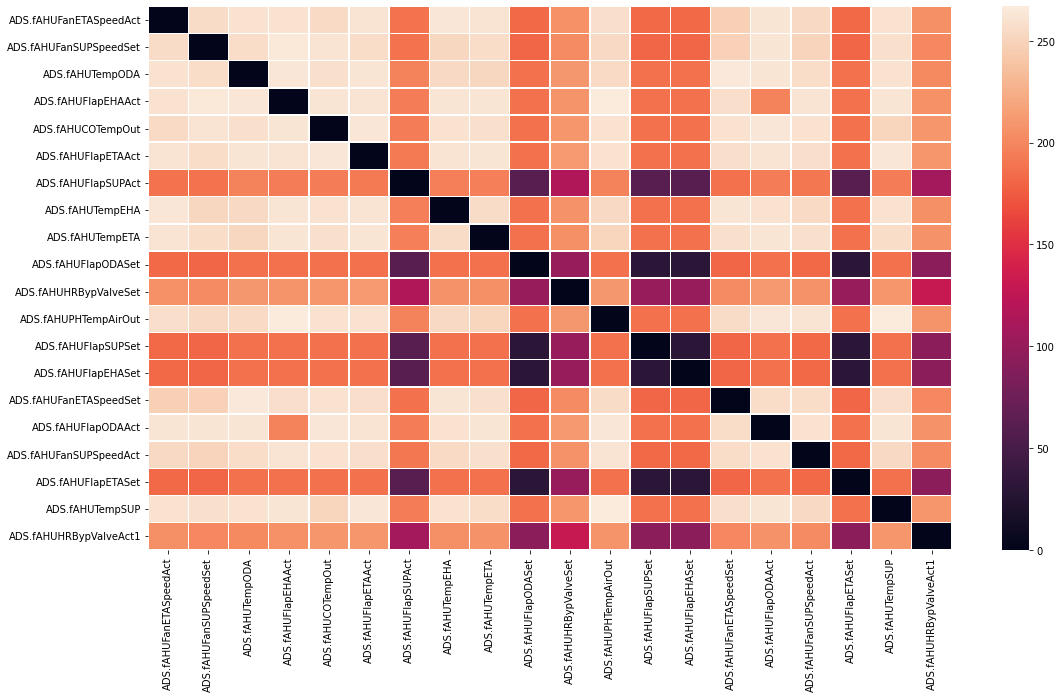

In [89]:
import matplotlib.pyplot as plt

eucs = np.empty([len(classes), len(classes)])
xaxislabels = []
yaxislabels = []

for i_idx in range(len(classes)):
    for j_idx in range(i_idx,len(classes)):
        temp_dist = []
        one_idx = np.asarray(Y == classes[i_idx]).nonzero()[0]
        two_idx = np.asarray(Y == classes[j_idx]).nonzero()[0]
        allvals_1 = []
        allvals_2 = []

        # for lidx in one_idx:
        #     for ridx in two_idx:
        #         dist = np.linalg.norm(X[lidx] - X[ridx])
        #         temp_dist.append(dist)
        # temp_avg = np.mean(temp_dist)
        for lidx in one_idx:
            allvals_1.extend(X[lidx].tolist())
        for ridx in two_idx:
            allvals_2.extend(X[ridx].tolist())
        allvals_1 = np.asarray(allvals_1)
        allvals_2 = np.asarray(allvals_2)
        # norm1 = np.linalg.norm(allvals_1)
        # norm2 = np.linalg.norm(allvals_2)
        # dist = np.linalg.norm((allvals_1/norm1) - (allvals_2/norm2))
        dist = np.linalg.norm(allvals_1 - allvals_2)
        # covar = np.cov(allvals_1,allvals_2)[0][1]
        # dist = 0.5*((np.linalg.norm((allvals_1-np.mean(allvals_1))-(allvals_2-np.mean(allvals_2)))**2) / (np.linalg.norm(allvals_1-np.mean(allvals_1))**2+np.linalg.norm(allvals_2-np.mean(allvals_2))**2))
        
        eucs[i_idx, j_idx] = dist
        eucs[j_idx, i_idx] = dist

eucs = np.round(eucs, decimals=2)
print(eucs.shape)

import seaborn as sns
hmap_labels = [s.replace('ADSInternalValuesMirror','') for s in classes]
fig = plt.figure(figsize=(18, 10)) 
ax = sns.heatmap(eucs, linewidth=0.5, xticklabels=hmap_labels, yticklabels=hmap_labels)

In [137]:
# Display DTW/graph edges matrix

path = './SimTSC/tmp/ebc_dtw/AHU_Minimal_2023.npy'
dtw_values = np.load(path, allow_pickle=True)
# print(data[()][0])

dtw_describe = pd.DataFrame(dtw_values)
dtw_describe.describe()

,0,1,2,3,4,5,6,7,8,9,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,...,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,0.050000,0.050000,0.050000,0.100000,0.050000,0.050000,0.100000,0.100000,0.050000,0.050000,...,0.100000,0.100000,0.100000,0.100000,0.050000,0.100000,0.100000,0.050000,0.050000,0.050000
std,0.218021,0.218021,0.218021,0.300104,0.218021,0.218021,0.300104,0.300104,0.218021,0.218021,...,0.300104,0.300104,0.300104,0.300104,0.218021,0.300104,0.300104,0.218021,0.218021,0.218021
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [140]:
from collections import defaultdict
from scipy.sparse import csr_matrix
from sklearn.preprocessing import LabelBinarizer

data_dir = './SimTSC/tmp'
dataset_name = 'AHU_Minimal_2023'

# Defining a dict 
graph = defaultdict(list)

# path = './SimTSC/tmp/ebc_dtw/AHU_Minimal_2023.npy'
path = os.path.join(data_dir, 'ebc_dtw', dataset_name+'.npy')
dtw_values = np.load(path, allow_pickle=True)
for i in range(dtw_values.shape[0]):    
    graph[i] = np.where(dtw_values[0] == 1)[0].tolist()

# load feature vectors
shot = 1
path = os.path.join(data_dir, 'ebc_'+str(shot)+'_shot', dataset_name+'.npy')
data = np.load(path, allow_pickle=True)
X_data = data[()]['X'].reshape((data[()]['X'].shape[0], data[()]['X'].shape[2]))

# train instances
tr_idx = data[()]['train_idx']
train_data = X_data[tr_idx]
tr_csr = csr_matrix(train_data)

# test instances
test_idx = data[()]['test_idx']
test_data = X_data[test_idx]
test_csr = csr_matrix(test_data)

# train + val i.e 'all' instances
val_idx = data[()]['val_idx']
val_data = X_data[val_idx]
trval_data = np.concatenate((train_data, val_data), axis=0)
trval_csr = csr_matrix(trval_data)

# train y-labels
train_labels = data[()]['y'][tr_idx]
lb = LabelBinarizer()
lb.fit(data[()]['y'])
# lb.classes_
train_y = lb.transform(train_labels)

# test y-labels
test_labels = data[()]['y'][test_idx]
test_y = lb.transform(test_labels)

# train + val i.e 'all' y-labels
trval_idx = np.concatenate((tr_idx, val_idx), axis=0)
trval_labels = data[()]['y'][trval_idx]
trval_y = lb.transform(trval_labels)

# test index
test_idx_list = test_idx.tolist()


In [141]:
# save all as pickle files

import pickle as pkl

dataset_str =  'ahu'
names = ['x', 'y', 'tx', 'ty', 'allx', 'ally', 'graph', 'test.index']
vars = [tr_csr, train_y, test_csr, test_y, trval_csr, trval_y, graph, test_idx_list]
for i in range(len(names)):
    with open("gcn/gcn/data/ind.{}.{}".format(dataset_str, names[i]), 'wb') as f:
        pkl.dump(vars[i], f)

In [142]:
# load pickle dataset files

import sys

dataset_str =  'ahu'
names = ['x', 'y', 'tx', 'ty', 'allx', 'ally', 'graph', 'test.index']
# names = ['x', 'y', 'tx', 'ty', 'allx', 'ally', 'graph']
# names = ['allx']
objects = []
for i in range(len(names)):
    with open("gcn/gcn/data/ind.{}.{}".format(dataset_str, names[i]), 'rb') as f:
        if sys.version_info > (3, 0):
            objects.append(pkl.load(f, encoding='latin1'))
        else:
            objects.append(pkl.load(f))

x, y, tx, ty, allx, ally, graph, test_idx_reorder = tuple(objects)
test_idx_range = np.sort(test_idx_reorder)

In [1]:
print(type(x))
print(type(tx))
print(type(allx))
print(type(y))
print(type(ty))
print(type(ally))
print(type(graph))
print(type(test_idx_range))

NameError: name 'x' is not defined

In [89]:
print(type(tr_csr))
print(type(test_csr))
print(type(trval_csr))
print(type(train_y))
print(type(test_y))
print(type(trval_y))
print(type(graph))
print(type(test_idx_list))

<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>
<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'collections.defaultdict'>
<class 'list'>


In [7]:
# load prediction labels as list from pickle file
import pickle
seed = 0
dataset = "AHU_Minimal_2023"
log_dir = './SimTSC/logs'
test_out_dir = os.path.join(log_dir, 'TEST')
preds_out_path = os.path.join(test_out_dir, dataset+'_'+str(seed)+'_preds')
with open (preds_out_path, 'rb') as fp:
    labellist = pickle.load(fp)